# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
from plotting import multiplot_pearson
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34526, 4)]        0         
                                                                 
 conv1d (Conv1D)             (None, 34510, 16)         1104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8627, 16)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8627, 16)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 8617, 32)          5664      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2154, 32)         0         
 1D)                                                         

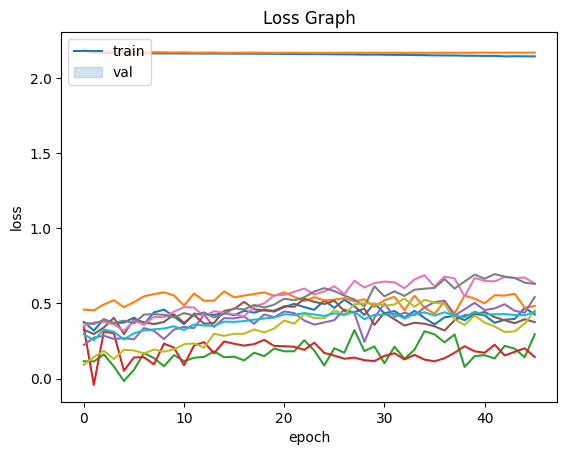

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 34526, 6)]        0         
                                                                 
 conv1d_3 (Conv1D)           (None, 34510, 16)         1648      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 8627, 16)         0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 8627, 16)          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 8617, 32)          5664      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 2154, 32)         0         
 1D)                                                       

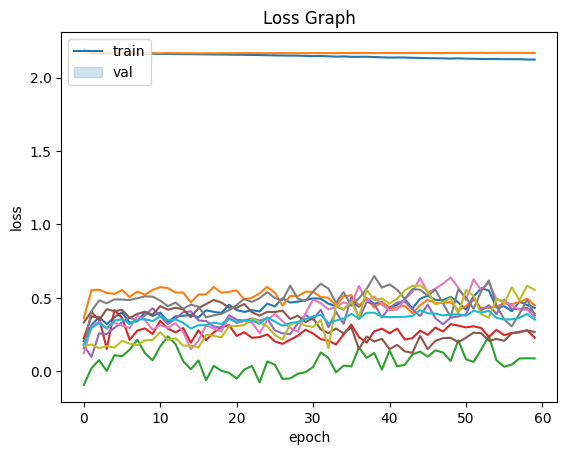

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 34526, 4)]        0         
                                                                 
 conv1d_6 (Conv1D)           (None, 34510, 16)         1104      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 17254, 16)        0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 17254, 16)         0         
                                                                 
 conv1d_7 (Conv1D)           (None, 17244, 32)         5664      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 8621, 32)         0         
 1D)                                                       

In [ ]:
architectures = ["CNN_Baseline_Classic", "CNN_Baseline_Classic_Struct", "CNN_Baseline_Strides", "CNN_Baseline_K1Reg", "CNN_Baseline_NoBias", "CNN_Baseline_4Conv", "CNN_Baseline_5Conv"]

history_list = []

for arch in architectures:

    model_name = arch
    model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

    input_size = (max_seq_len, 6) if params_dataLoader_train["struct"] else (max_seq_len, 4)

    model = CNN(input_size=input_size,
                params_model=params_model,
                metrics=[Pearson(return_dict=True)]
                )

    model.print_model()
    model.summary()
    # model.summary() #if information about number of params needed

    history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                     params_train_dataLoader=params_dataLoader_train,
                                     params_eval_dataLoader=params_dataLoader_valid,
                                     params_train=params_train,
                                     callback=[EarlyStopping(monitor='loss', patience=3)])

    multiplot_pearson(history.history)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plt_data = [history.history['loss'], history.history['val_loss']]
    plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

    history_list.append(history.history)

    model.print_model(model_architecture_path)
    model.save_model(model_output_path)